# Analysis of Simple Parallel Paths

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from LoadBalancingAnalysis import utils

In [2]:
dir_path = '/Users/mattb/Desktop/Research/ns3-load-balancing/outputs/simple-parallel-paths/'

def construct_lb_path(load, scheme):
    load_str = str(load)[0:3]
    return os.path.join(os.path.join(os.path.join(dir_path, load_str), scheme), 'lb-metrics.csv')

In [3]:
from collections import namedtuple

PerfStats = namedtuple(
    'PerfStats',
    ['effective_rate', 'loss_rate', 'delay_sum', 'jitter_sum', 'load'])

spray_small = []
ecmp_small = []
drill_small = []
letflow_small = []

spray_large = []
ecmp_large = []
drill_large = []
letflow_large = []

In [4]:
TIME_NORMALIZER = 1000000.0
TIME_CUTOFF = 2000000.0

def construct_perf_stats(df, load):
    effective_rate = np.mean(df['EffectiveRate'] / TIME_NORMALIZER)
    loss_rate = np.mean(((df['TxPackets'] - df['RxPackets']) / df['TxPackets']))
    delay_sum = np.mean(df['DelaySum'] / TIME_NORMALIZER)
    jitter_sum = np.mean(df['JitterSum'] / TIME_NORMALIZER)
    return PerfStats(effective_rate, loss_rate * 100, delay_sum, jitter_sum, load)

def get_perf_stats_for_scheme_at_load(scheme, load, src_addr,
                                      small_scheme_arr,
                                      large_scheme_arr):
    df = utils.get_lb_performance_metrics(construct_lb_path(load, scheme))
    df_src = df[df["SourceAddress"] == src_addr]
    df_small = df_src[df_src["TimeFirstTxPacket"] < TIME_CUTOFF]
    df_large = df_src[df_src["TimeFirstTxPacket"] >= TIME_CUTOFF]
    small_scheme_arr.append(construct_perf_stats(df_small, load))
    large_scheme_arr.append(construct_perf_stats(df_large, load))

def populate_all_perf_stats_for_scheme(scheme, src_addr,
                                       small_scheme_arr,
                                       large_scheme_arr):
    for load in [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:
        get_perf_stats_for_scheme_at_load(
            scheme, load, src_addr, small_scheme_arr, large_scheme_arr)

In [5]:
populate_all_perf_stats_for_scheme("packet_spray", "10.1.1.1", spray_small, spray_large)
populate_all_perf_stats_for_scheme("ecmp", "10.1.1.1", ecmp_small, ecmp_large)
populate_all_perf_stats_for_scheme("drill", "10.1.1.1", drill_small, drill_large)
populate_all_perf_stats_for_scheme("letflow", "10.1.1.1", letflow_small, letflow_large)

In [6]:
COLOR_MAP = {"Drill": "blue",
             "Letflow": "orange",
             "Packet_Spray": "red",
             "ECMP": "pink"}

def plot_small_and_large(val_idx, small_arr, large_arr, label,
                         color, ax_small, ax_large):
    x = [perf_stats[4] for perf_stats in small_arr]
    y = [perf_stats[val_idx] for perf_stats in small_arr]
    ax_small.plot(x, y, label=label, color=color)
    
    x = [perf_stats[4] for perf_stats in large_arr]
    y = [perf_stats[val_idx] for perf_stats in large_arr]
    ax_large.plot(x, y, label=label, color=color)

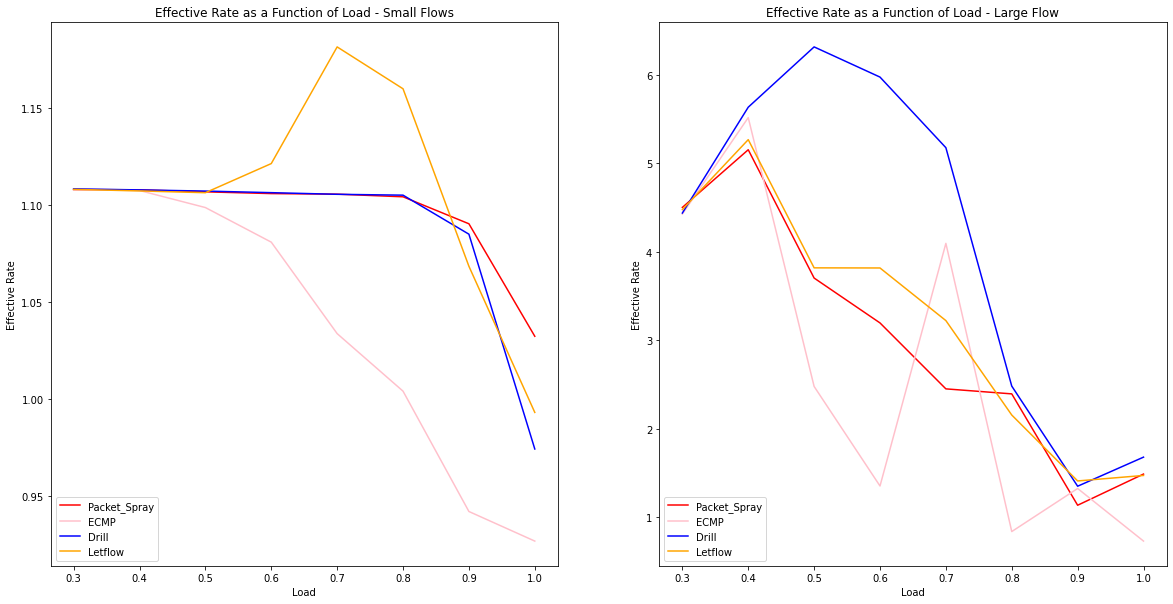

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
plot_small_and_large(
    0, spray_small, spray_large, "Packet_Spray",
    COLOR_MAP['Packet_Spray'], ax1, ax2)
plot_small_and_large(
    0, ecmp_small, ecmp_large, "ECMP",
    COLOR_MAP["ECMP"], ax1, ax2)
plot_small_and_large(
    0, drill_small, drill_large, "Drill",
    COLOR_MAP["Drill"], ax1, ax2)
plot_small_and_large(
    0, letflow_small, letflow_large, "Letflow",
    COLOR_MAP["Letflow"], ax1, ax2)

ax1.set_xlabel("Load")
ax1.set_ylabel("Effective Rate")
ax1.legend(loc='lower left')
ax1.set_title("Effective Rate as a Function of Load - Small Flows")

ax2.set_xlabel("Load")
ax2.set_ylabel("Effective Rate")
ax2.legend(loc='lower left')
ax2.set_title("Effective Rate as a Function of Load - Large Flow")

plt.show()

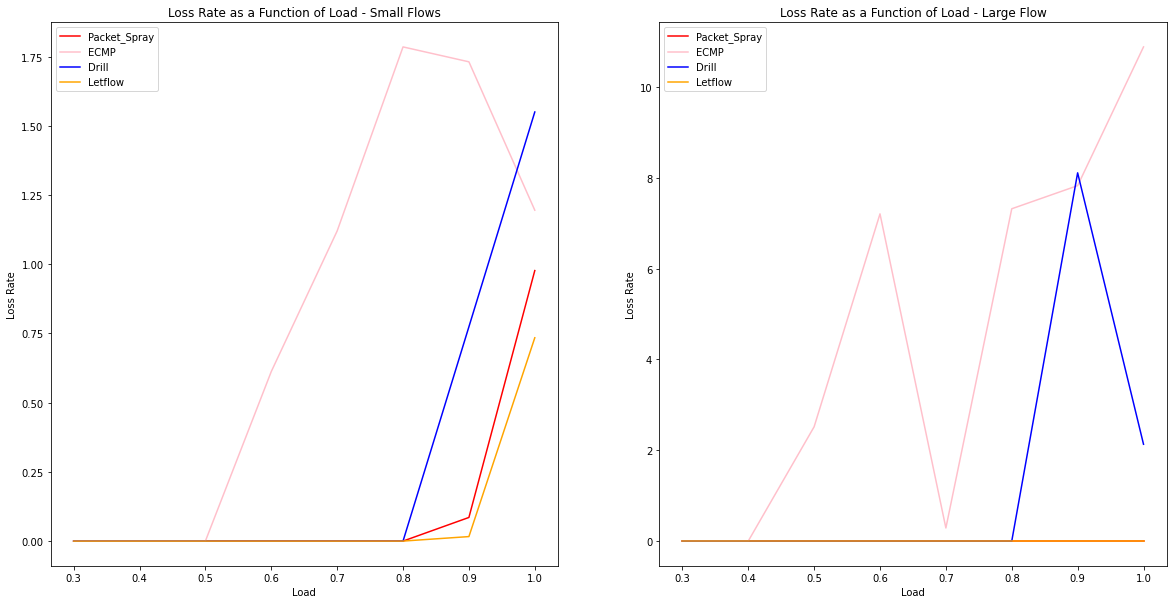

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
plot_small_and_large(
    1, spray_small, spray_large, "Packet_Spray",
    COLOR_MAP['Packet_Spray'], ax1, ax2)
plot_small_and_large(
    1, ecmp_small, ecmp_large, "ECMP",
    COLOR_MAP["ECMP"], ax1, ax2)
plot_small_and_large(
    1, drill_small, drill_large, "Drill",
    COLOR_MAP["Drill"], ax1, ax2)
plot_small_and_large(
    1, letflow_small, letflow_large, "Letflow",
    COLOR_MAP["Letflow"], ax1, ax2)

ax1.set_xlabel("Load")
ax1.set_ylabel("Loss Rate")
ax1.legend(loc='upper left')
ax1.set_title("Loss Rate as a Function of Load - Small Flows")

ax2.set_xlabel("Load")
ax2.set_ylabel("Loss Rate")
ax2.legend(loc='upper left')
ax2.set_title("Loss Rate as a Function of Load - Large Flow")

plt.show()

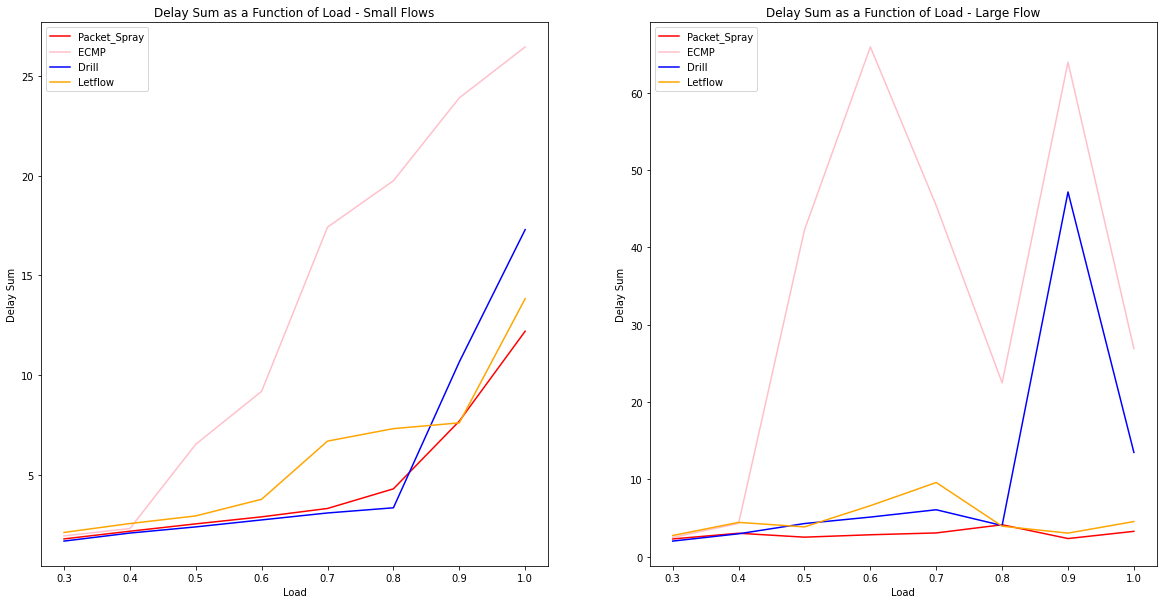

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
plot_small_and_large(
    2, spray_small, spray_large, "Packet_Spray",
    COLOR_MAP['Packet_Spray'], ax1, ax2)
plot_small_and_large(
    2, ecmp_small, ecmp_large, "ECMP",
    COLOR_MAP["ECMP"], ax1, ax2)
plot_small_and_large(
    2, drill_small, drill_large, "Drill",
    COLOR_MAP["Drill"], ax1, ax2)
plot_small_and_large(
    2, letflow_small, letflow_large, "Letflow",
    COLOR_MAP["Letflow"], ax1, ax2)

ax1.set_xlabel("Load")
ax1.set_ylabel("Delay Sum")
ax1.legend(loc='upper left')
ax1.set_title("Delay Sum as a Function of Load - Small Flows")

ax2.set_xlabel("Load")
ax2.set_ylabel("Delay Sum")
ax2.legend(loc='upper left')
ax2.set_title("Delay Sum as a Function of Load - Large Flow")

plt.show()

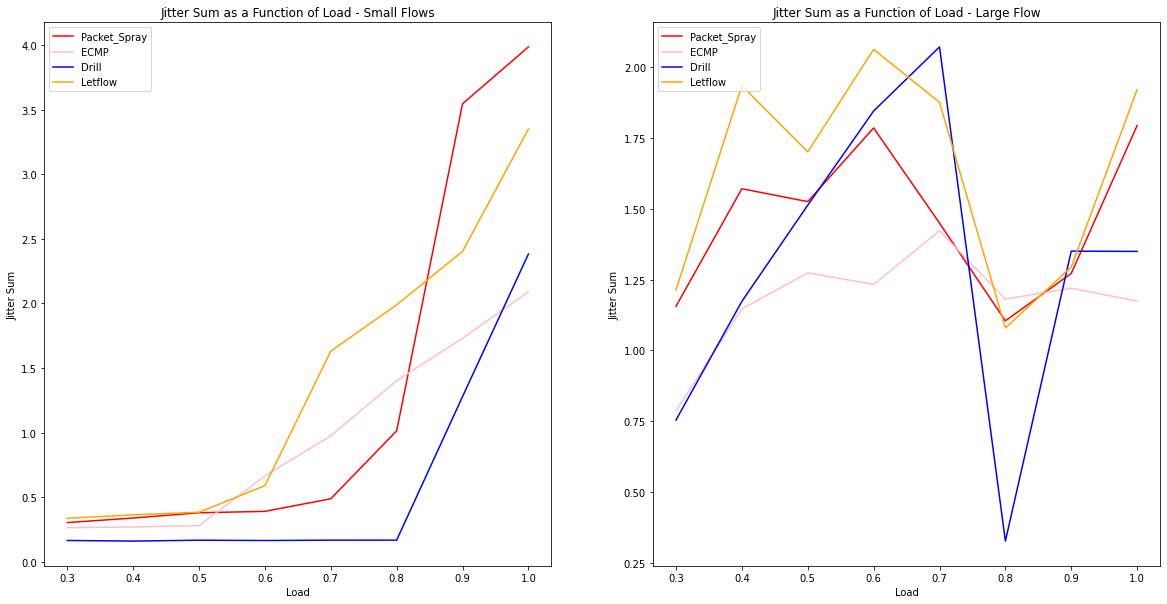

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
plot_small_and_large(
    3, spray_small, spray_large, "Packet_Spray",
    COLOR_MAP['Packet_Spray'], ax1, ax2)
plot_small_and_large(
    3, ecmp_small, ecmp_large, "ECMP",
    COLOR_MAP["ECMP"], ax1, ax2)
plot_small_and_large(
    3, drill_small, drill_large, "Drill",
    COLOR_MAP["Drill"], ax1, ax2)
plot_small_and_large(
    3, letflow_small, letflow_large, "Letflow",
    COLOR_MAP["Letflow"], ax1, ax2)

ax1.set_xlabel("Load")
ax1.set_ylabel("Jitter Sum")
ax1.legend(loc='upper left')
ax1.set_title("Jitter Sum as a Function of Load - Small Flows")

ax2.set_xlabel("Load")
ax2.set_ylabel("Jitter Sum")
ax2.legend(loc='upper left')
ax2.set_title("Jitter Sum as a Function of Load - Large Flow")

plt.show()